# Detection of COVID with the help of Chest X-ray images using Machine Learning and Deep Learning models

## Team Members:
### Dishanth G - 18BCE1090 - Model Training  and Evaluation
### Maddukuri Mohan Bullabbai -18BCE1217 - Web Application

# EDA and CNN Model

## Loading Libraries

In [1]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import cv2                 
import numpy as np         
import os                  
from random import shuffle
import tensorflow as tf 
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import glob as gb
from tensorflow.keras.utils import to_categorical
import seaborn as sns

from matplotlib.image import imread

import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.callbacks import LearningRateScheduler


# Loading the dataset Images

In [5]:
train_dir="../input/chest-xray-covid19-pneumonia/Data/train"
test_dir="../input/chest-xray-covid19-pneumonia/Data/test"

TRAIN_COVID_PATH = "../input/chest-xray-covid19-pneumonia/Data/train/COVID19"

TRAIN_NORMAL_PATH = "../input/chest-xray-covid19-pneumonia/Data/train/NORMAL"
TRAIN_PNE_PATH = "../input/chest-xray-covid19-pneumonia/Data/train/PNEUMONIA"


VAL_NORMAL_PATH = "../input/chest-xray-covid19-pneumonia/Data/test/NORMAL"
VAL_PNEU_PATH = "../input/chest-xray-covid19-pneumonia/Data/test/PNEUMONIA"
VAL_COVID_PATH = "../input/chest-xray-covid19-pneumonia/Data/test/COVID19"

In [6]:
Pneumonaimages = os.listdir(TRAIN_PNE_PATH)
Normalimages=os.listdir(TRAIN_NORMAL_PATH)
COVID19images = os.listdir(TRAIN_COVID_PATH)

# Exploratory Data Analysis

## Frequency Distribution of the images based on the classification

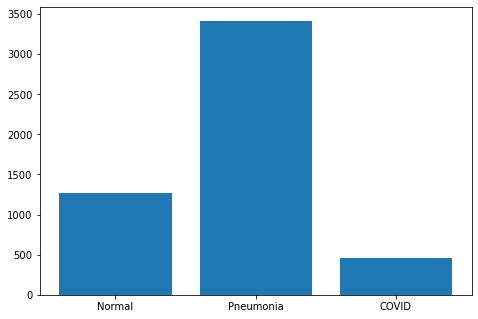

In [12]:

lent=[len(Normalimages),len(Pneumonaimages),len(COVID19images)]
imglab=['Normal','Pneumonia','COVID']
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(imglab,lent)
plt.show()

## Find the average size of the images in the data

In [8]:
dim1 = []
dim2 = []

for i in range(len(Pneumonaimages)):
    raw_image = plt.imread(os.path.join(TRAIN_PNE_PATH,Pneumonaimages[i]))
    d1,d2,c = raw_image.shape
    dim1.append(d1)
    dim2.append(d2)

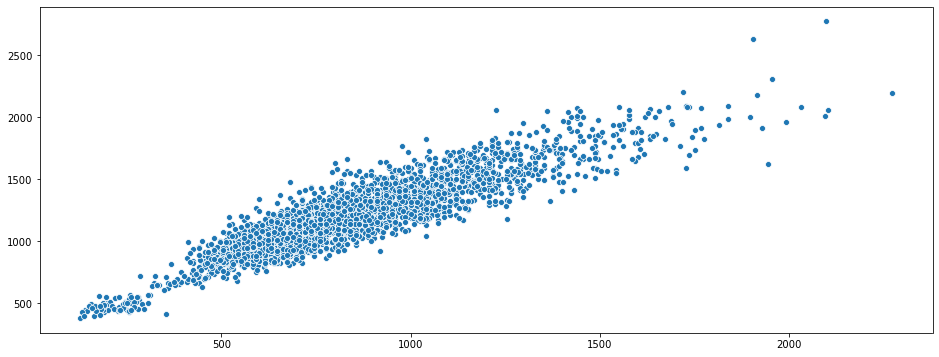

In [9]:
plt.figure(figsize=(16,6))
sns.scatterplot(dim1, dim2)

In [10]:
np.mean(dim1)

828.5772381509655

In [11]:
np.mean(dim2)

1189.5617320070216

##  Histogram Analysis on the distribution of pixel intensities for each classification

### For Pneumonia:

The dimensions of the image are 760 pixels width and 1184 pixels height, one single color channel
The maximum pixel value is 255.0000 and the minimum is 0.0000
The mean value of the pixels is 110.2595 and the standard deviation is 55.2558


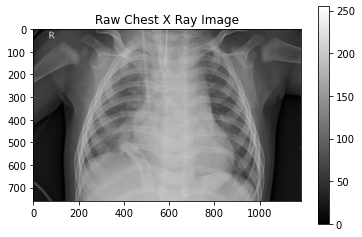

In [13]:
raw_image = plt.imread(os.path.join(TRAIN_PNE_PATH,Pneumonaimages[0]))
plt.imshow(raw_image, cmap='gray')
plt.imshow(raw_image, cmap='gray')
plt.colorbar()
plt.title('Raw Chest X Ray Image')
print(f"The dimensions of the image are {raw_image.shape[0]} pixels width and {raw_image.shape[1]} pixels height, one single color channel")
print(f"The maximum pixel value is {raw_image.max():.4f} and the minimum is {raw_image.min():.4f}")
print(f"The mean value of the pixels is {raw_image.mean():.4f} and the standard deviation is {raw_image.std():.4f}")

Text(0, 0.5, '# Pixels in Image')

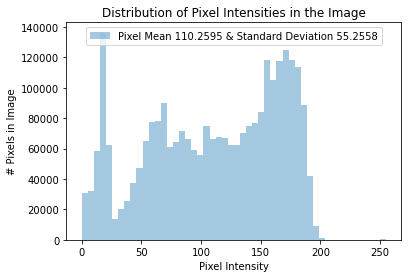

In [14]:
sns.distplot(raw_image.ravel(), 
             label=f'Pixel Mean {np.mean(raw_image):.4f} & Standard Deviation {np.std(raw_image):.4f}', kde=False)
plt.legend(loc='upper center')
plt.title('Distribution of Pixel Intensities in the Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('# Pixels in Image')

### For COVID-19:

The dimensions of the image are 1235 pixels width and 1507 pixels height, one single color channel
The maximum pixel value is 255.0000 and the minimum is 0.0000
The mean value of the pixels is 146.6016 and the standard deviation is 54.6026


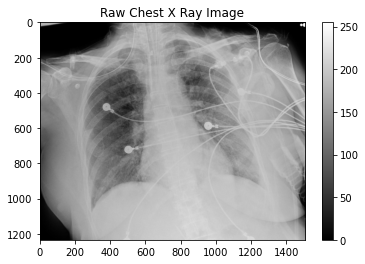

In [13]:
raw_image = plt.imread(os.path.join(TRAIN_COVID_PATH,COVID19images[3]))
plt.imshow(raw_image, cmap='gray')
plt.imshow(raw_image, cmap='gray')
plt.colorbar()
plt.title('Raw Chest X Ray Image')
print(f"The dimensions of the image are {raw_image.shape[0]} pixels width and {raw_image.shape[1]} pixels height, one single color channel")
print(f"The maximum pixel value is {raw_image.max():.4f} and the minimum is {raw_image.min():.4f}")
print(f"The mean value of the pixels is {raw_image.mean():.4f} and the standard deviation is {raw_image.std():.4f}")

Text(0, 0.5, '# Pixels in Image')

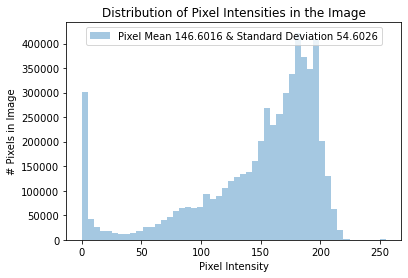

In [14]:
sns.distplot(raw_image.ravel(), 
             label=f'Pixel Mean {np.mean(raw_image):.4f} & Standard Deviation {np.std(raw_image):.4f}', kde=False)
plt.legend(loc='upper center')
plt.title('Distribution of Pixel Intensities in the Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('# Pixels in Image')

### For Normal Images:

The dimensions of the image are 1013 pixels width and 1472 pixels height, one single color channel
The maximum pixel value is 255.0000 and the minimum is 0.0000
The mean value of the pixels is 132.8995 and the standard deviation is 67.1453


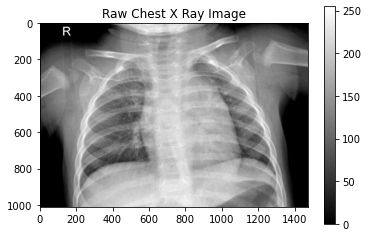

In [17]:
raw_image = plt.imread(os.path.join(TRAIN_NORMAL_PATH,Normalimages[0]))
plt.imshow(raw_image, cmap='gray')
plt.imshow(raw_image, cmap='gray')
plt.colorbar()
plt.title('Raw Chest X Ray Image')
print(f"The dimensions of the image are {raw_image.shape[0]} pixels width and {raw_image.shape[1]} pixels height, one single color channel")
print(f"The maximum pixel value is {raw_image.max():.4f} and the minimum is {raw_image.min():.4f}")
print(f"The mean value of the pixels is {raw_image.mean():.4f} and the standard deviation is {raw_image.std():.4f}")

Text(0, 0.5, '# Pixels in Image')

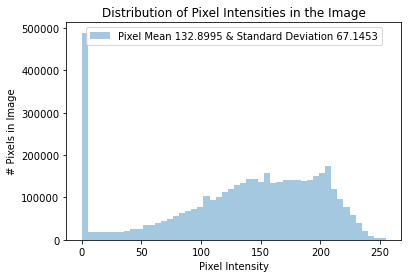

In [18]:
sns.distplot(raw_image.ravel(), 
             label=f'Pixel Mean {np.mean(raw_image):.4f} & Standard Deviation {np.std(raw_image):.4f}', kde=False)
plt.legend(loc='upper center')
plt.title('Distribution of Pixel Intensities in the Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('# Pixels in Image')

In [19]:
average_image_size = (400,400,3)

## Image Augmentation

In [21]:
generator = ImageDataGenerator(
    rotation_range=0,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.2,
    fill_mode='nearest',
    horizontal_flip=False,
    vertical_flip=False,
    rescale=1/255,
)

In [22]:
generator.flow_from_directory(test_dir)

Found 1288 images belonging to 3 classes.


In [23]:
generator.flow_from_directory(train_dir)


Found 5144 images belonging to 3 classes.


In [24]:
train_generator = generator.flow_from_directory (
    train_dir,
    target_size=average_image_size[:2],
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
)

Found 5144 images belonging to 3 classes.


In [25]:
test_generator = generator.flow_from_directory (
    test_dir,
    target_size=average_image_size[:2],
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False,
)


Found 1288 images belonging to 3 classes.


In [10]:


train_generator.class_indices



{'COVID19': 0, 'NORMAL': 1, 'PNEUMONIA': 2}

## Applying CNN Model with 3 Convolutional Layers

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [28]:
stop = EarlyStopping(monitor="val_loss", mode="min", patience=6)

In [29]:
model = Sequential()
model.add(Conv2D(filters = 32, padding = "same", kernel_size = (2,2), strides = (2,2), activation = "relu", input_shape = average_image_size))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Conv2D(filters = 32, padding = "same", kernel_size = (2,2), strides = (2,2), activation = "relu", input_shape = average_image_size))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Conv2D(filters = 64, padding = "same", kernel_size = (2,2), strides = (2,2), activation = "relu", input_shape = average_image_size))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(units = 132, activation = "relu"))
model.add(Dense(units = 60, activation = "relu"))
model.add(Dense(units = 3, activation = "softmax"))
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [30]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 200, 200, 32)      416       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 50, 50, 32)        4128      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 64)        8256      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2304)              0

In [31]:

model.fit_generator(train_generator, validation_data=test_generator, epochs=10, callbacks=[stop])

Epoch 1/10
161/161 [==============================] - 421s 3s/step - loss: 0.5888 - accuracy: 0.7564 - val_loss: 0.3796 - val_accuracy: 0.8564
Epoch 2/10
161/161 [==============================] - 345s 2s/step - loss: 0.3574 - accuracy: 0.8643 - val_loss: 0.3286 - val_accuracy: 0.8734
Epoch 3/10
161/161 [==============================] - 345s 2s/step - loss: 0.3082 - accuracy: 0.8781 - val_loss: 0.2878 - val_accuracy: 0.9084
Epoch 4/10
161/161 [==============================] - 341s 2s/step - loss: 0.2784 - accuracy: 0.8981 - val_loss: 0.2667 - val_accuracy: 0.9092
Epoch 5/10
161/161 [==============================] - 342s 2s/step - loss: 0.2610 - accuracy: 0.9030 - val_loss: 0.2989 - val_accuracy: 0.9014
Epoch 6/10
161/161 [==============================] - 344s 2s/step - loss: 0.2569 - accuracy: 0.9055 - val_loss: 0.2245 - val_accuracy: 0.9247
Epoch 7/10
161/161 [==============================] - 344s 2s/step - loss: 0.2410 - accuracy: 0.9112 - val_loss: 0.2238 - val_accuracy: 0.9099

## Finding Accuracy of the model

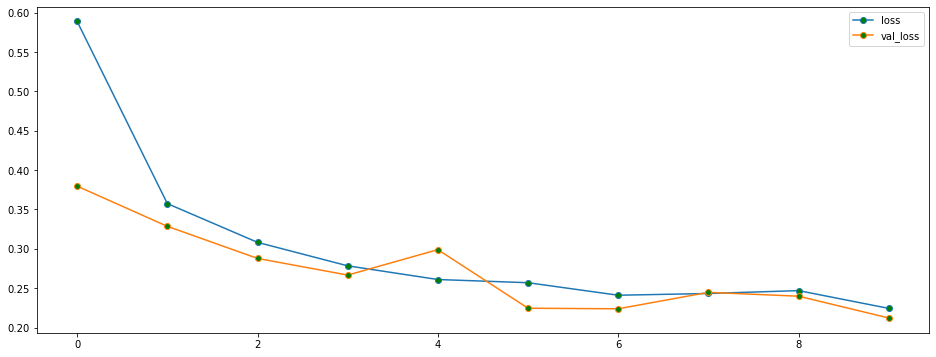

In [32]:
pd.DataFrame(model.history.history)[["loss", "val_loss"]].plot(figsize =(16,6), marker = "o", mfc = "g")


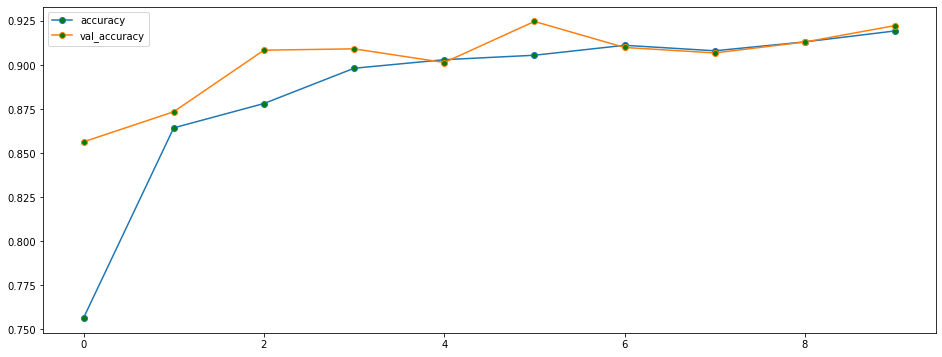

In [33]:
pd.DataFrame(model.history.history)[["accuracy", "val_accuracy"]].plot(figsize =(16,6), marker = "o", mfc = "g")


In [34]:
predictions = model.predict(test_generator)


In [35]:
pred_labels = np.argmax(predictions, axis = 1)


In [36]:
from sklearn.metrics import classification_report


In [22]:
print(classification_report(test_generator.classes, pred_labels))
confusion_matrix(test_generator.classes, pred_labels)

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       116
           1       0.85      0.87      0.86       317
           2       0.95      0.94      0.95       855

    accuracy                           0.92      1288
   macro avg       0.91      0.92      0.91      1288
weighted avg       0.93      0.92      0.92      1288



array([[109,   3,   4],
       [  5, 276,  36],
       [  5,  44, 806]])

### Accuracy: 92%

## Test on a random data

In [39]:
from tensorflow.keras.preprocessing import image


In [40]:
from random import randint
random_index = randint(1, len(os.listdir(train_dir+"/COVID19")))
random_covid_image_name = os.listdir(train_dir+"/COVID19")[random_index]

In [41]:
random_covid_image_name

'COVID19(9).jpg'

In [42]:
covid_img_path = train_dir+"/COVID19/"+random_covid_image_name


In [43]:
random_covid_img = image.load_img(covid_img_path, target_size=average_image_size)


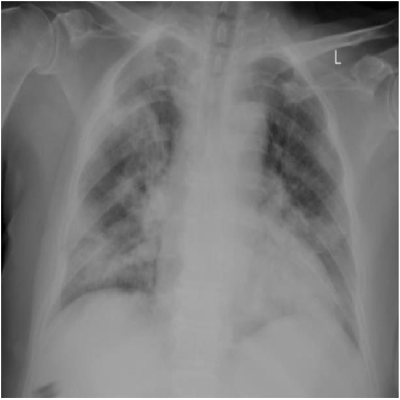

In [44]:
random_covid_img


In [45]:
random_covid_img_array = image.img_to_array(random_covid_img)


In [46]:
random_covid_img_array.shape


(400, 400, 3)

In [47]:
covid_img_array = np.expand_dims(random_covid_img_array, axis=0)


In [48]:
covid_img_array.shape


(1, 400, 400, 3)

In [49]:
a=np.argmax(model1.predict(covid_img_array), axis =1)
print(a)

[0]


In [50]:
test_generator.class_indices


{'COVID19': 0, 'NORMAL': 1, 'PNEUMONIA': 2}

## Finding the best feautures in the image that has helped in classifying the disease.

In [92]:
def visualize(file_path,ax,text_loc):
    test_image = cv2.imread(data_path + file_path)
    test_image = cv2.resize(test_image, (400, 400),interpolation=cv2.INTER_NEAREST)
    test_image = np.expand_dims(test_image,axis=0)
    probs = model1.predict(test_image)
    pred_class = np.argmax(probs)
    pred_class = class_dict[pred_class]

    explainer = lime_image.LimeImageExplainer()
    explanation = explainer.explain_instance(test_image[0], model1.predict, top_labels=5, hide_color=0, num_samples=1000)
    temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)


    ax.imshow(mark_boundaries(temp, mask))
    fig.text(text_loc, 0.9, "Predicted Class: " + pred_class , fontsize=13)
    true_class = find_true_class(file_path)
    if true_class is not None:
        fig.text(text_loc, 0.86, "Actual Class: " + true_class , fontsize=13)

In [104]:
def find_true_class(file_path):
    true_class = None
    if 'COVID19' in file_path:
        true_class = 'COVID19'
    elif 'PNEUMONIA' in file_path:
        true_class = 'PNEUMONIA'
    elif 'NORMAL' in file_path:
        true_class = 'NORMAL'
    return true_class

In [85]:
data_path = '/kaggle/input/chest-xray-covid19-pneumonia/Data'

In [99]:
from lime import lime_image
from skimage.segmentation import mark_boundaries
class_dict = {0:'COVID19',
              1:'NORMAL',
              2:'PNEUMONIA'}

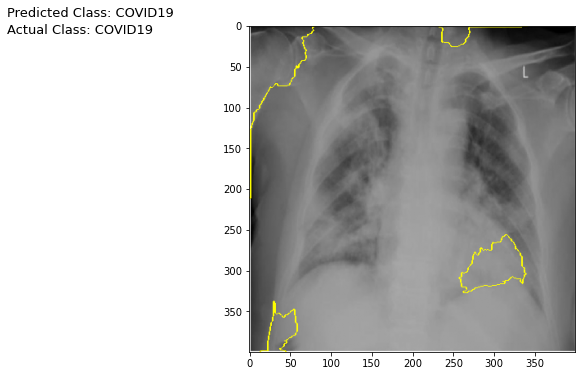

In [110]:
fig,ax = plt.subplots(1,1,figsize=(18,6))
visualize('/train/COVID19/COVID19(9).jpg',ax,0.20)
